In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# import data files
happiness_df = pd.read_csv('../Resources/Gallup2018.csv')

avg_temp_df = pd.read_csv('../Resources/Weather/Avg_Temp_2018.csv', header=3)
max_temp_df = pd.read_csv('../Resources/Weather/Max_Temp_2018.csv', header=3)
min_temp_df = pd.read_csv('../Resources/Weather/Min_Temp_2018.csv', header=3)
precipitation_df = pd.read_csv('../Resources/Weather/Precipitation_2018.csv', header=3)

### looking at the datasets

In [3]:
happiness_df.head()

,State,2018 sample size,Well-Being Index,Well-Being Index Rank,Career,Social,Financial,Community,Physical
0,Hawaii,502,64.6,1,1,1,1,4,4
1,Wyoming,219,64.2,2,3,18,6,1,3
2,Alaska,212,63.9,3,5,8,2,23,1
3,Montana,488,63.5,4,4,19,17,2,7
4,Utah,1214,63.4,5,2,4,13,9,14


In [4]:
avg_temp_df.head()

,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,100,Alabama,64.5,113.0,1.4,63.1
1,200,Arizona,62.3,125.0,2.9,59.4
2,300,Arkansas,61.2,96.0,0.8,60.4
3,400,California,60.1,122.0,2.7,57.4
4,500,Colorado,47.2,119.0,2.6,44.6


In [5]:
max_temp_df.head()

,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,100,Alabama,75.2,77.0,0.3,74.9
1,200,Arizona,76.5,123.0,3.1,73.4
2,300,Arkansas,71.5,59.0,-0.2,71.7
3,400,California,72.7,123.0,2.8,69.9
4,500,Colorado,61.3,121.0,2.9,58.4


In [6]:
min_temp_df.head()

,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,100,Alabama,53.7,121.0,2.5,51.2
1,200,Arizona,48.0,126.0,2.7,45.3
2,300,Arkansas,50.8,114.0,1.7,49.1
3,400,California,47.5,122.0,2.7,44.8
4,500,Colorado,33.0,119.0,2.2,30.8


In [7]:
precipitation_df.head()

,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,100,Alabama,64.40,109.0,9.15,55.25
1,200,Arizona,11.67,59.0,-0.95,12.62
2,300,Arkansas,64.32,119.0,14.71,49.61
3,400,California,18.09,35.0,-4.30,22.39
4,500,Colorado,14.96,15.0,-3.16,18.12


### cleaning the datasets / getting ready to merge

In [8]:
# clean each weather data set to get ready to merge
avg_temp_df = avg_temp_df.rename(columns={'Location': 'State', 'Value': 'Avg_Temp'})
avg_temp_df = avg_temp_df.drop(columns=['Location ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean'])

max_temp_df = max_temp_df.rename(columns={'Location': 'State', 'Value': 'Max_Temp'})
max_temp_df = max_temp_df.drop(columns=['Location ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean'])

min_temp_df = min_temp_df.rename(columns={'Location': 'State', 'Value': 'Min_Temp'})
min_temp_df = min_temp_df.drop(columns=['Location ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean'])

precipitation_df = precipitation_df.rename(columns={'Location': 'State', 'Value': 'Precip'})
precipitation_df = precipitation_df.drop(columns=['Location ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean'])

In [9]:
# clean the happiness data set to get ready to merge
happiness_df = happiness_df.drop(columns=['2018 sample size', 'Well-Being Index Rank', 'Career', 'Social', 'Financial', 'Physical'])

### merge the datasets

In [10]:
# merge all weather dataframes into one dataframe
weather_df = pd.merge(avg_temp_df, max_temp_df, on='State')
weather_df = pd.merge(weather_df, min_temp_df, on='State')
weather_df = pd.merge(weather_df, precipitation_df, on='State')
weather_df.head()

,State,Avg_Temp,Max_Temp,Min_Temp,Precip
0,Alabama,64.5,75.2,53.7,64.40
1,Arizona,62.3,76.5,48.0,11.67
2,Arkansas,61.2,71.5,50.8,64.32
3,California,60.1,72.7,47.5,18.09
4,Colorado,47.2,61.3,33.0,14.96


In [11]:
# merge the weather and happiness datasets together by State
weather_happy_df = pd.merge(happiness_df, weather_df, on='State')
weather_happy_df.head()

,State,Well-Being Index,Community,Avg_Temp,Max_Temp,Min_Temp,Precip
0,Hawaii,64.6,4,78.1,84.0,73.5,16.93
1,Wyoming,64.2,1,42.4,55.5,29.4,16.12
2,Alaska,63.9,23,30.4,37.5,23.4,37.90
3,Montana,63.5,2,41.3,53.1,29.5,19.98
4,Utah,63.4,9,50.4,63.3,37.5,11.58


### exploratory basic analysis

In [12]:
weather_happy_df.describe()

,Well-Being Index,Community,Avg_Temp,Max_Temp,Min_Temp,Precip
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,61.466000,25.50000,53.068000,63.662000,42.492000,43.551600
std,1.488817,14.57738,9.327432,9.446561,9.592192,19.294056
min,57.000000,1.00000,30.400000,37.500000,23.400000,9.270000
25%,60.650000,13.25000,46.450000,56.450000,35.875000,26.362500
50%,61.500000,25.50000,52.350000,62.800000,42.350000,46.120000
75%,62.425000,37.75000,59.850000,70.700000,48.000000,62.925000
max,64.600000,50.00000,78.100000,84.000000,73.500000,68.350000


### graphing and testing correlation

In [13]:
# save the columns as variables to make graphing easier
well_being = weather_happy_df.iloc[:,1]
avg_temp = weather_happy_df.iloc[:,3]
max_temp = weather_happy_df.iloc[:,4]
min_temp = weather_happy_df.iloc[:,5]
precip = weather_happy_df.iloc[:,6]

#### happiness vs average temperature

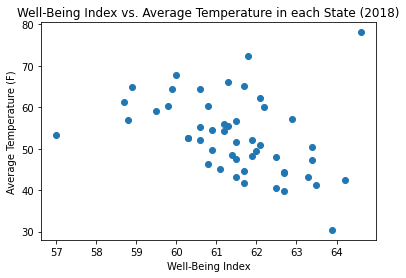

In [14]:
# happiness vs average temperture

# plot the scatter plot
plt.scatter(well_being, avg_temp)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Average Temperature (F)')
plt.title('Well-Being Index vs. Average Temperature in each State (2018)')

plt.show()

The r-squared is: 0.12681176072835904
The correlation between both factors is -0.36


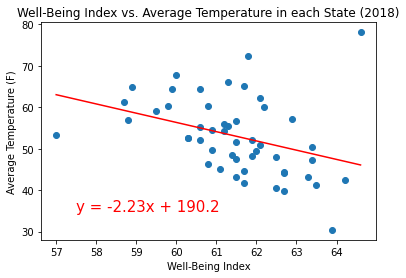

In [15]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, avg_temp)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, avg_temp)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 35),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Average Temperature (F)')
plt.title('Well-Being Index vs. Average Temperature in each State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, avg_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVAvgTemp.png")

#### happiness vs. maximum temperature

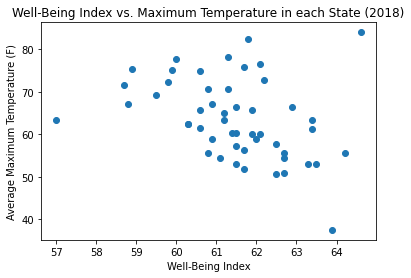

In [16]:
# happiness vs maximum temperture

# plot the scatter plot
plt.scatter(well_being, max_temp)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Average Maximum Temperature (F)')
plt.title('Well-Being Index vs. Maximum Temperature in each State (2018)')

plt.show()

The r-squared is: 0.1176167710655919
The correlation between both factors is -0.34


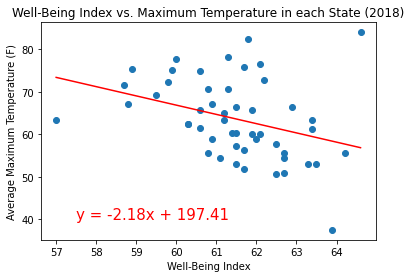

In [17]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, max_temp)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, max_temp)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 40),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Average Maximum Temperature (F)')
plt.title('Well-Being Index vs. Maximum Temperature in each State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVMaxTemp.png")

#### happiness vs. minimum temperature

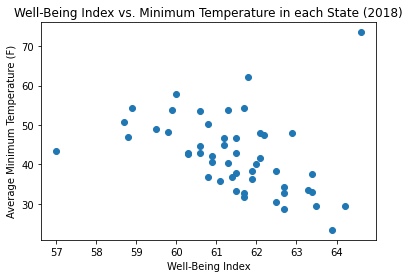

In [18]:
# happiness vs minimum temperture

# plot the scatter plot
plt.scatter(well_being, min_temp)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Average Minimum Temperature (F)')
plt.title('Well-Being Index vs. Minimum Temperature in each State (2018)')

plt.show()

The r-squared is: 0.12026373548405114
The correlation between both factors is -0.35


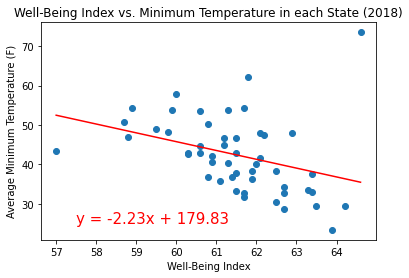

In [19]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, min_temp)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, min_temp)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5, 25),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Average Minimum Temperature (F)')
plt.title('Well-Being Index vs. Minimum Temperature in each State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, min_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVMinTemp.png")

#### happiness vs. precipitation

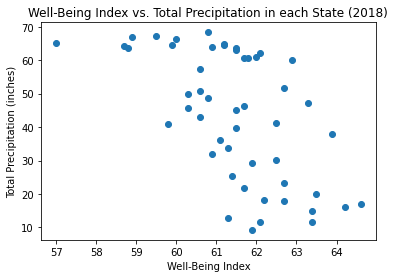

In [20]:
# happiness vs minimum temperture

# plot the scatter plot
plt.scatter(well_being, precip)

# formatting
plt.xlabel('Well-Being Index')
plt.ylabel('Total Precipitation (inches)')
plt.title('Well-Being Index vs. Total Precipitation in each State (2018)')

plt.show()

The r-squared is: 0.34879399312899567
The correlation between both factors is -0.59


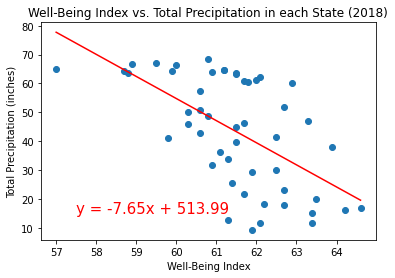

In [21]:
# calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(well_being, precip)
regress_values = well_being * slope + intercept

# create the line equation string to go onto the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and regression line
plt.scatter(well_being, precip)
plt.plot(well_being, regress_values, 'r-')

# formatting
plt.annotate(line_eq,(57.5,15),fontsize=15,color="red")
plt.xlabel('Well-Being Index')
plt.ylabel('Total Precipitation (inches)')
plt.title('Well-Being Index vs. Total Precipitation in each State (2018)')

# print r-squared value
print(f"The r-squared is: {rvalue**2}")

# print the correlation
correlation = st.pearsonr(well_being, precip)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# save image of plot
plt.savefig("../Images/WellBeingVPrecip.png")